In [2]:
## Extracting Features

## 1. Invert the image and then convert it to a binary image 
# IMPORT data by batches (by character in the image (0,1,2,3...etc))

# preprocess with parallel computing

# check Pillow version number
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



# NumPy uses asarra() to convert PIL images into NumPy arrays

## 2. to find contours, use 'findContour' function. For features, obtain bounding rectangle of contour
## using 'boudningRect' function

# 3. calculate the area of the bounding rectange of each contour and select the rectangle with max area

# 4. resize the max area bounding rectangle to 28 by 28. Reshape to 784 x 1
## now give corresponding label to each image (0-9 images, same label as their digit)
## for - , assign label 10, for + 11, and for * 12



In [10]:
# Creates batches of tensor image data with real-time data augmentation
# holds 20% of dataset for validation
train_datagen = ImageDataGenerator(rescale = 1./255,    
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = .2)

# Define path to directory where my data is
path = '/Users/paulscemama/AutomatingArith/train'

# get batches of augmented data for training
train = train_datagen.flow_from_directory(path,
    target_size = (64,64),
    color_mode = "grayscale",
    classes = ['-','+','=','0','1','2','3','4','5','6','7','8','9','*'],
    class_mode = 'categorical',
    subset = 'training',
    seed = 121)

val = train_datagen.flow_from_directory(path,
    target_size = (64,64),
    color_mode = 'grayscale',
    classes = ['-','+','=','0','1','2','3','4','5','6','7','8','9','*'],
    class_mode = 'categorical',
    subset = 'validation',
    seed = 121
)




Found 133182 images belonging to 14 classes.
Found 33288 images belonging to 14 classes.


In [3]:
def prepare_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,1)))
    model.add(MaxPooling2D(pool_size = (2,2)))    
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(14, activation = 'softmax'))

    # compile 
    optimizer = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [4]:
classify = prepare_model()


In [5]:
classify.fit(train,
                    validation_data = val,
                    steps_per_epoch = train.n//train.batch_size,
                    validation_steps = val.n//val.batch_size,
                    epochs=5)

Epoch 1/5
4160/4161 [============================>.] - ETA: 0s - loss: 0.4289 - accuracy: 0.8706

KeyboardInterrupt: 

In [4]:
from keras.models import model_from_json

In [14]:
# Evaluate model
score = classify.evaluate(val)


1041/1041 [==============================] - 40s 39ms/step


In [15]:
print('Val Accuracy', score[1])

Val Accuracy 0.9317471981048584


In [2]:
# save weights and model

# Serialize model to json
classify_json = classify.to_json()
with open('classify_json','w') as json_file:
    json_file.write(classify_json)

# Serialize weights to HDF5
classify.save_weights('classify_weights.h5')

NameError: name 'classify' is not defined

In [6]:
# Ensure it worked by loading in the model and testing its performance
# load model
json_file = open('classify_json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_classify = model_from_json(loaded_model_json)
# load weights
loaded_classify.load_weights('classify_weights.h5')



In [ ]:
# evaluate model
loaded_classify.compile(loss = 'binary_crossentropy', optimizer = SGD(lr = 0.01, momentum = 0.9), metrics = ['accuracy'])
loaded_score = loaded_classify.evaluate(val, verbose = 0)
print('Accuracy', loaded_score[1])

## Localization Model

Need to first create a new dataset

In [10]:
# Define path to directory where my data is
path = '/Users/paulscemama/AutomatingArith/train'
def create_random_sample(symbol, percentage):
        path = '/Users/paulscemama/AutomatingArith/train'
        if symbol == 'times':
                filenames = np.array([f for f in os.listdir(path + '/' + symbol)])
        else:
                filenames = np.array([f for f in os.listdir(path + '/' + symbol) if f[0] == symbol])
        np.random.seed(1)
        random_samp = np.random.choice(filenames, int(len(filenames)* percentage))
        return random_samp

In [11]:
# create samples
np.random.seed(1)
random_minus = create_random_sample('-', 0.1)
random_plus = create_random_sample('+',0.1)
random_equals = create_random_sample('=',0.2)
random_zeros = create_random_sample('0',0.25)
random_ones = create_random_sample('1', 0.25)
random_twos = create_random_sample('2', 0.25)
random_threes = create_random_sample('3', 0.25)
random_fours = create_random_sample('4', 0.25)
random_fives = create_random_sample('5', 0.25)
random_sixes = create_random_sample('6', 0.25)
random_sevens = create_random_sample('7', 0.25)
random_eights = create_random_sample('8', 0.25)
random_nines = create_random_sample('9', 0.25)
random_times = create_random_sample('times', 0.1)

In [12]:
from PIL import Image

np.random.seed(1)
minus = Image.open(path + '/-/' + random_minus[np.random.randint(0,len(random_minus))])
plus = Image.open(path + '/+/' + random_plus[np.random.randint(0,len(random_plus))])
equals = Image.open(path + '/=/' + random_equals[np.random.randint(0,len(random_equals))])
zero = Image.open(path + '/0/' + random_zeros[np.random.randint(0,len(random_zeros))])
one = Image.open(path + '/1/' + random_ones[np.random.randint(0,len(random_ones))])
two = Image.open(path + '/2/' + random_twos[np.random.randint(0,len(random_twos))])
three = Image.open(path + '/3/' + random_threes[np.random.randint(0,len(random_threes))])
four = Image.open(path + '/4/' + random_fours[np.random.randint(0,len(random_fours))])
five = Image.open(path + '/5/' + random_fives[np.random.randint(0,len(random_fives))])
six = Image.open(path + '/6/' + random_sixes[np.random.randint(0,len(random_sixes))])
seven = Image.open(path + '/7/' + random_sevens[np.random.randint(0,len(random_sevens))])
eight = Image.open(path + '/8/' + random_eights[np.random.randint(0,len(random_eights))])
nine = Image.open(path + '/9/' + random_nines[np.random.randint(0,len(random_nines))])
times = Image.open(path + '/times/' + random_times[np.random.randint(0,len(random_times))])

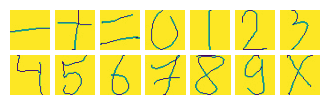

In [13]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(4.,4.))
grid = ImageGrid(fig, 111,
            nrows_ncols = (2,7),
            axes_pad = 0.05)

for ax, im in zip(grid, [minus,plus,equals,zero,one,two,three,four,five,six,seven,eight,nine,times]):
    ax.set_axis_off()
    ax.imshow(im)

plt.show()



In [37]:
random_sevens[10]

'7_102093.jpg'

In [48]:
# Need to now create lists of images of proper expression form
np.random.seed(1)
# Make a dataset of shuffled digits (exclude 0)
import itertools
random_digit_files = itertools.chain(random_ones,random_twos,random_threes,
    random_fours,random_fives,random_sixes,random_sevens,random_eights,
    random_nines)
random_digit_files = list(random_digit_files)
np.random.shuffle(random_digit_files)

# Make a dataset of shuffled operators
random_operator_files = itertools.chain(random_minus, random_plus, random_times)
random_operator_files = list(random_operator_files)
np.random.shuffle(random_operator_files)



['2_92778.jpg',
 '-_62693.jpg',
 '2_101091.jpg',
 '-_87015.jpg',
 '8_42832.jpg',
 '+_40062.jpg',
 '1_65158.jpg',
 'exp55175.jpg',
 '2_11929.jpg',
 '-_25960.jpg',
 '2_93598.jpg',
 '+_45132.jpg',
 '5_59477.jpg',
 '+_10542.jpg',
 '1_57309.jpg',
 '-_9546.jpg',
 '5_44237.jpg',
 '-_42938.jpg',
 '2_112258.jpg']

In [67]:

def random_expression_generator(digit_files, operator_files):
    length = np.random.randint(3,10)
    if (length % 2) != 0:
        length += 1
    expression = []
    for i in range(length-1):
        expression.append(digit_files[np.random.randint(0,len(digit_files))])
        expression.append(operator_files[np.random.randint(0,len(operator_files))])
    expression.append(digit_files[np.random.randint(0,len(digit_files))])
    return expression

np.random.seed(1)
unmerged_expression = []
for i in range(5):
    unmerged_expression.append(random_expression_generator(random_digit_files, random_operator_files))

In [102]:
## Construct the (unfinished) dataset of expressions

import sys
from PIL import Image

def merge_images(expression):
        images = []
        for element in expression:
            if element[0:3] == 'exp' or element[0:5] == 'times':
                image = Image.open(path + '/times/' + element)
            else:
                image = Image.open(path + '/' + element[0] + '/' + element)
                            
            as_np = np.asarray(image)
            mod_image = np.hstack((as_np, np.ones(len(as_np)).reshape(len(as_np),1)*255))
            mod_image = Image.fromarray(mod_image)
            mod_image = mod_image.convert("L")
            images.append(mod_image)

        print(images)
        images_com = np.hstack((np.asarray(image) for image in images))
        images_com = Image.fromarray(images_com)
        print(images_com)
        #imgs_com.save('exp_'+str(i))
        images_com.save('Test.jpg')

test = merge_images(unmerged_expression[0])


[<PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDAD10>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDAE90>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA4D0>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDAA90>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDAA50>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA410>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA6D0>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA450>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA610>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDAF50>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDAB10>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA690>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA510>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDDA350>, <PIL.Image.Image image mode=L size=46x45 at 0x7FBC2DDC0510>]
<PIL.Image.Image image mode=L size=690x45 at 0x7FBC2DDDCA50>


/Users/paulscemama/opt/anaconda3/envs/DeepCpf1/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


[[255 255 253 ... 255 255 255]
 [252 253 255 ... 255 255 255]
 [255 255 252 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [80]:
i =1
print('exp_'+str(i))

exp_1
